In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])

lr = LinearRegression()
pr = LinearRegression()

quadratic = PolynomialFeatures(degree=2)

X_quad = quadratic.fit_transform(X)

In [3]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

In [4]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

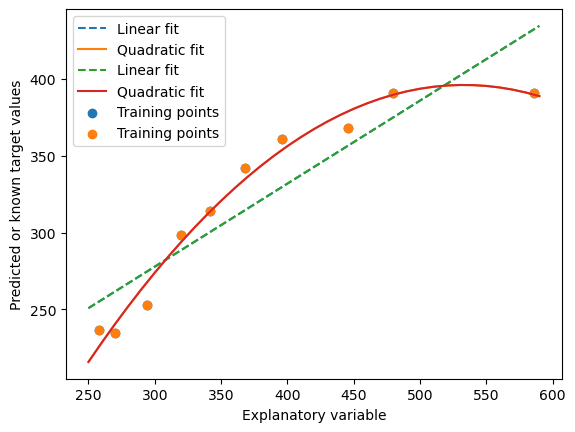

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.show()

MSE と R2 を計算

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

print('Training MSE linear: %.3f, quadratic: %.3f' % (
    mean_squared_error(y, y_lin_pred),
    mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
    r2_score(y, y_lin_pred),
    r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


Housing データセットを二次、三次で近似する

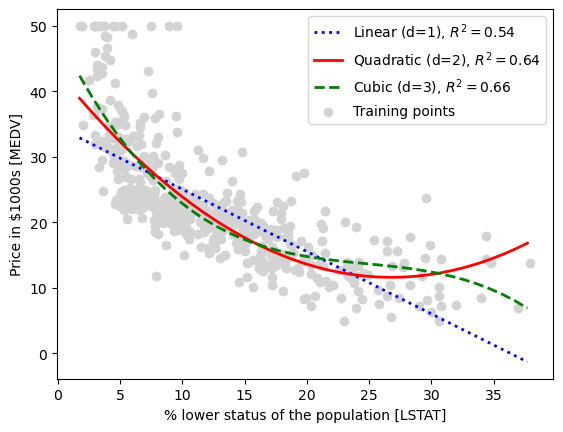

In [8]:
import pandas as pd

df = pd.read_csv('../../data/housing/housing.data.txt', header=None, sep='\s+')

df.columns = ['CRIME', 'ZN', 'INDUS', 'CHAS',
              'NOX', 'RM', 'AGE', 'DIS', 'RAD',
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

X = df[['LSTAT']].values
y = df['MEDV'].values
reg = LinearRegression()

quad = PolynomialFeatures(degree=2)
cube = PolynomialFeatures(degree=3)

X_quad = quad.fit_transform(X)
X_cube = cube.fit_transform(X)

# 線形
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
reg = reg.fit(X, y)
y_lin_fit = reg.predict(X_fit)
linear_r2 = r2_score(y, reg.predict(X))

# 二次
reg = reg.fit(X_quad, y)
y_quad_fit = reg.predict(quadratic.fit_transform(X_fit))
quad_r2 = r2_score(y, reg.predict(X_quad))

# 三次
reg = reg.fit(X_cube, y)
y_cube_fit = reg.predict(cube.fit_transform(X_fit))
cube_r2 = r2_score(y, reg.predict(X_cube))

# plot
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='Quadratic (d=2), $R^2=%.2f$' % quad_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cube_fit,
         label='Cubic (d=3), $R^2=%.2f$' % cube_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')
plt.show()

対数で近似した方が良さそうなので、対数で処理

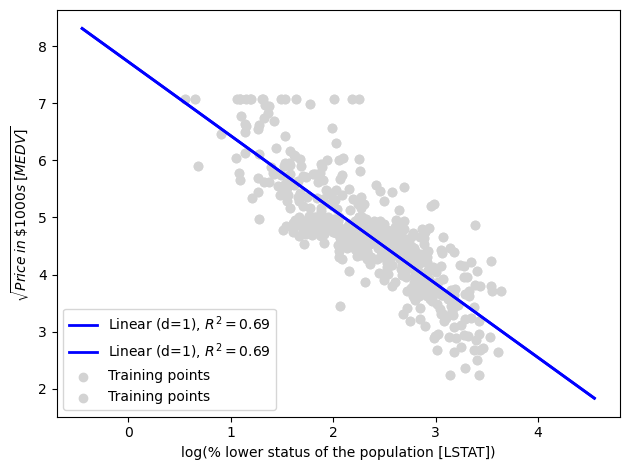

In [10]:
X_log = np.log(X)
y_sqrt = np.sqrt(y)

X_fit = np.arange(X_log.min() - 1, X_log.max() + 1, 1)[:, np.newaxis]
reg = reg.fit(X_log, y_sqrt)
y_lin_fit = reg.predict(X_fit)
linear_r2 = r2_score(y_sqrt, reg.predict(X_log))

plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='Linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()